In [58]:
import numpy as np
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

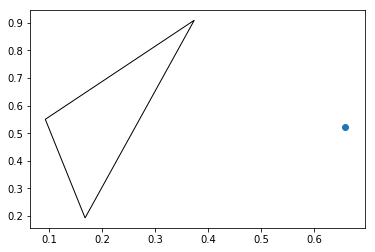

In [60]:
fig, ax = plt.subplots()
num_polygons = 1
num_dots = 1
num_sides = 3

for i in range(num_polygons):
    polygon = Polygon(np.random.rand(num_sides, 2), True, fill=False)
    ax.add_patch(polygon)


x = np.random.rand(num_dots)
y = np.random.rand(num_dots)

ax.scatter(x,y)
plt.show()
